In [13]:
import numpy as np

In [14]:
def grs(b, n):
    f1,f2,off1,off2 = np.random.rand(4,b,1)
    time = np.linspace(0,1,n)
    s = 0.5 * np.sin((time-off1)*(f1*10+10))
    s += 0.2 * np .sin((time-off2)*(f2*10+10))
    s += 0.1*(np.random.rand(b, n)-0.5)
    return(s[..., np.newaxis].astype(np.float32))

In [15]:
n_pasos = 50
n_pasos_desp = 10
series = grs(10000,n_pasos+n_pasos_desp)

In [16]:
series.shape

(10000, 60, 1)

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
print(series.shape)

(10000, 60, 1)


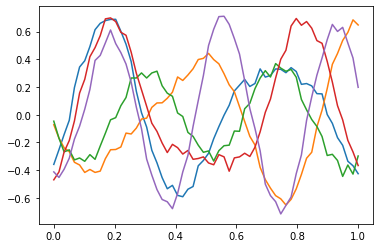

In [19]:
plt.plot(np.linspace(0,1,n_pasos+n_pasos_desp),series[0,:])
plt.plot(np.linspace(0,1,n_pasos+n_pasos_desp),series[1,:])
plt.plot(np.linspace(0,1,n_pasos+n_pasos_desp),series[10,:])
plt.plot(np.linspace(0,1,n_pasos+n_pasos_desp),series[30,:])
plt.plot(np.linspace(0,1,n_pasos+n_pasos_desp),series[20,:])
plt.show()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Activation, Dense, Dropout


In [21]:
modelo_001 = Sequential([
    SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
    SimpleRNN(20),
    Dense(10)
])
modelo_002 = Sequential([
    SimpleRNN(20, return_sequences = True, input_shape = [None, 1]),
    SimpleRNN(20),
    Dense(60)
])

In [22]:
X_train, Y_train = series[:7000,:n_pasos], series[:7000,-10:,0]
X_val, Y_val = series[7000:9000,:n_pasos], series[7000:9000,-10:,0]
X_test, Y_test = series[9000:,:n_pasos], series[9000:,-10:,0]

In [23]:
print(X_train.shape, Y_train.shape)

(7000, 50, 1) (7000, 10)


In [40]:
modelo_002.compile(loss = "mse", metrics=["accuracy"])

In [46]:
modelo_002.fit(x = X_train, y = Y_train, epochs = 10)

Epoch 1/10
219/219 [==============================] - 13s 60ms/step - loss: 0.0080 - accuracy: 0.2829
Epoch 2/10
219/219 [==============================] - 13s 60ms/step - loss: 0.0075 - accuracy: 0.2896
Epoch 3/10
219/219 [==============================] - 13s 60ms/step - loss: 0.0071 - accuracy: 0.3046
Epoch 4/10
219/219 [==============================] - 14s 63ms/step - loss: 0.0068 - accuracy: 0.3147
Epoch 5/10
219/219 [==============================] - 13s 61ms/step - loss: 0.0065 - accuracy: 0.3214
Epoch 6/10
219/219 [==============================] - 13s 61ms/step - loss: 0.0063 - accuracy: 0.3283
Epoch 7/10
219/219 [==============================] - 13s 60ms/step - loss: 0.0061 - accuracy: 0.3326
Epoch 8/10
219/219 [==============================] - 14s 62ms/step - loss: 0.0061 - accuracy: 0.3281
Epoch 9/10
219/219 [==============================] - 14s 62ms/step - loss: 0.0059 - accuracy: 0.3399
Epoch 10/10
219/219 [==============================] - 13s 61ms/step - loss: 0.005

In [47]:
y_pred = modelo_002.predict(X_test[:1,:n_pasos])
y_pred.shape

(1, 60)

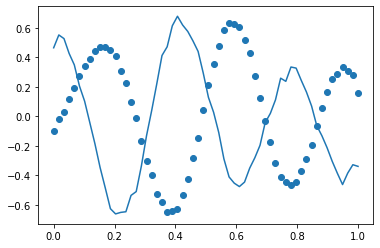

In [48]:
plt.plot(np.linspace(0,1,60),series[9000,:])
plt.scatter(np.linspace(0,1,60)[:],y_pred[0,:])

Carece de sentido predecir todo lo que ya conoces usando lo que ya conoces, es mas bien predecir lo que no conoces dado algo que si conoces, por ejemplo las ventas de un año entero dado el conocer las ventas del año pasado a ese.